In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import random
import pandas as pd

### Visualize Decision Boundary

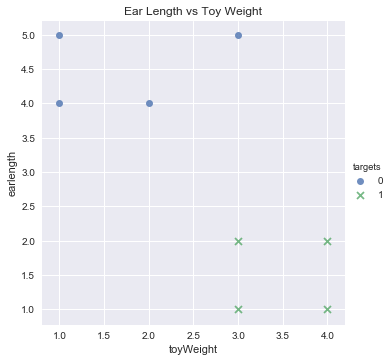

In [2]:
#Inputs and Targets
toyWeight = np.array([1,1,2,3,3,3,4,4])
earLength = np.array([4,5,4,5,1,2,1,2])
targets = [0,0,0,0,1,1,1,1]

#Create dataframeand plot with seaborn
df = pd.DataFrame({'toyWeight':toyWeight, "earlength":earLength, "targets":targets})

sb.lmplot(x = "toyWeight", y = "earlength", data = df,
         hue = "targets", markers = ["o", "x"], fit_reg = False)

plt.title("Ear Length vs Toy Weight")

### i. Initialize and Train Perceptron

In [12]:
def perceptron(X, Y,epochs):
    '''
    Arguements:
    X: input array
    Y: target vector
    
    Returns: 
    w: 2x1 array of weights updated after initialization at zero
    b: bias updated after initialization at zero
    '''
#     np.random.seed(1)
    w = np.zeros(len(X[0]))
    b = np.zeros((1,1))
    epochs = epochs

    #Define hardlim
    def hardlim(n):
        if n >= 0:
            a = 1
        else: 
            a = 0 
        return a
    
    #Run for X number of epochs
    for t in range(epochs):
        for i, x in enumerate(X):
            a = hardlim(np.dot(X[i], w) + b)
            if a != Y[i]:
                error = Y[i] - a
                w = w + error*X[i]
                b = b + error
        print("Weights:",w, "Bias:",b)
        return w,b

inputs = np.array([[1,4], [1,5], [2,4], [2,5], [3,1], [3,2], [4,1], [4,2]])
targets = np.array([0,0,0,0,1,1,1,1])    
w,b = perceptron(inputs,targets,10000)

Weights: [ 2. -3.] Bias: [[ 0.]]


### ii. Test Weight Vector of [2,-3] and Bias of [0] on Input Vectors

In [6]:
def predict(w1,w2,b,X,Y):
    
    def hardlim(n):
        if n >= 0:
            a = 1
        else: 
            a = 0 
        return a
    
    predicted_target = []
    for i in range(0,len(X)):
        if hardlim(np.dot([w1,w2],X[i])+ b) != Y[i]:
            print('Incorrect')
            predicted_target.append(hardlim(np.dot([w1,w2],X[i])+ b))
        else: 
            print("Correct")
            predicted_target.append(hardlim(np.dot([w1,w2],X[i])+ b))
    return predicted_target

In [7]:
predictedTargets = predict(w[0],w[1],b,inputs, targets)
predictedTargets

Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct


[0, 0, 0, 0, 1, 1, 1, 1]

### iii. Plot the input and decision boundary to validate results

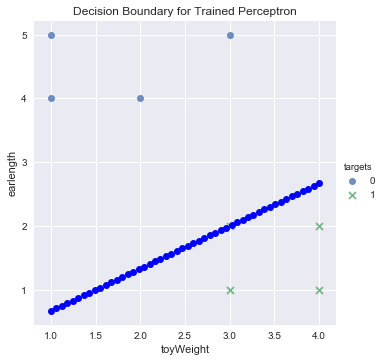

In [13]:
sb.lmplot(x = "toyWeight", y = "earlength", data = df,
         hue = "targets", markers = ["o", "x"], fit_reg = False)

'''
Here is the equation of the perceptron: w1*toyWeight + w2*earlength + bias 
where W1 = [2, -3] and b = 0.

2*toyWeight + (-3)*earlength + 0 = 0 therefore the equation of the decision boundary 
in two dimensions is: earlength = 2/3*toyWeight 
'''

for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
    slope = 2/3 
    intercept = 0

    y = (slope*i) + intercept
    plt.plot(i, y, 'bo')

plt.title("Decision Boundary for Trained Perceptron")